#### Business Problem



The goal of this analysis is to explore patterns related to employee attrition, 
workload, performance, and tenure. The insights drawn from this EDA section will help HR 
teams identify risk factors and design targeted retention strategies.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df= pd.read_csv('hr_features_dataset.csv')
df.head()

,EmployeeID,Age,Department,SatisfactionScore,LastEvaluationScore,NumProjects,AvgMonthlyHours,YearsAtCompany,Attrition,HoursPerProject,PerformanceRatio,TenureCategory,High_Risk_Employee
0,896999,41,finance,0.41,0.67,2,135,13,0,67.50,0.62,Experienced,0
1,331148,41,hr,0.74,0.80,7,235,16,1,33.57,0.94,Experienced,0
2,559437,36,operations,0.74,0.57,6,197,10,0,32.83,1.29,Mid,0
3,883201,41,finance,0.97,0.88,5,156,13,0,31.20,1.11,Experienced,0
4,562242,41,finance,0.36,0.65,8,218,17,1,27.25,0.55,Mid,1


In [12]:
df.columns

Index(['EmployeeID', 'Age', 'Department', 'SatisfactionScore',
       'LastEvaluationScore', 'NumProjects', 'AvgMonthlyHours',
       'YearsAtCompany', 'Attrition', 'HoursPerProject', 'PerformanceRatio',
       'TenureCategory', 'High_Risk_Employee'],
      dtype='object')

## Exploratory Data Analysis (EDA)

#### 1. Target Variable (Attrition)

How many employees leave vs stay?

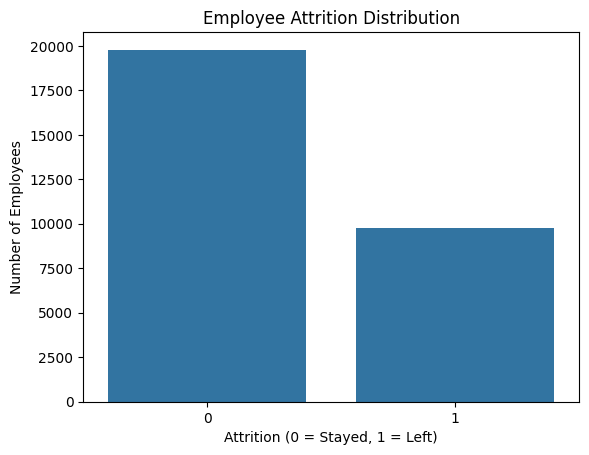

In [25]:
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Employees")
plt.show()



- Attrition is highly imbalanced (~33% of employees left vs 67%  employees stayed), which we will address in modeling.

#### 2. Attrition by Department

Which departments lose more employees?

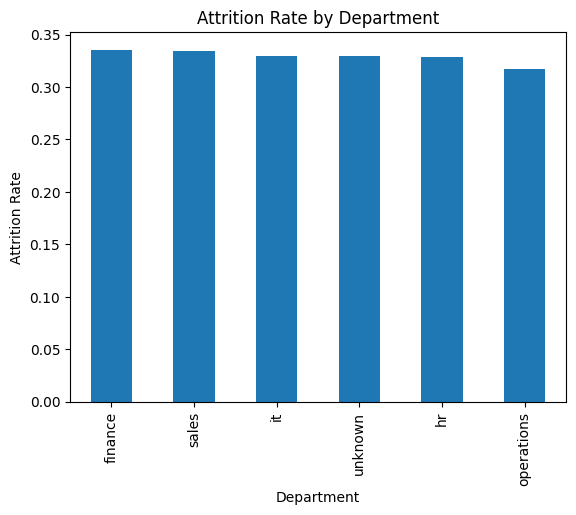

In [43]:
dept_attrition = df.groupby("Department")["Attrition"].mean().sort_values(ascending=False)

dept_attrition.plot(kind="bar")
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.show()



Finance shows the highest attrition rate (33.3%), followed by HR and sales.
In contrast, Operations has the lowest attrition rate across departments.

This pattern suggests department-specific retention challenges, which may include:

- Uneven workload distribution and project allocation

- Differences in management style and leadership effectiveness

- Role-specific stress levels and limited career advancement opportunities


#### 3. Attrition by Tenure Category

At what stage do employees leave most often?

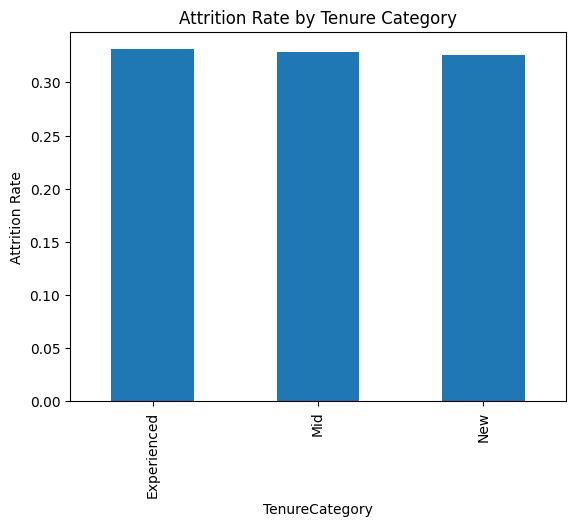

In [40]:
tenure_attrition = df.groupby("TenureCategory")["Attrition"].mean()

tenure_attrition.plot(kind="bar")
plt.title("Attrition Rate by Tenure Category")
plt.ylabel("Attrition Rate")
plt.show()



Mid-tenure employees (2-5 years) show higher attrition than new hires.

This pattern suggests a potential engagement or growth plateau, where longer-tenured employees begin to reassess their long-term future with the organization. Likely contributing factors include:

- Limited career advancement opportunities.

- Compensation not keeping pace with market benchmarks.

- Reduced access to new challenges or skill development.

- Attractive external opportunities that value their accumulated experience.


#### 4. Workload vs Attrition

Does workload intensity drive attrition?

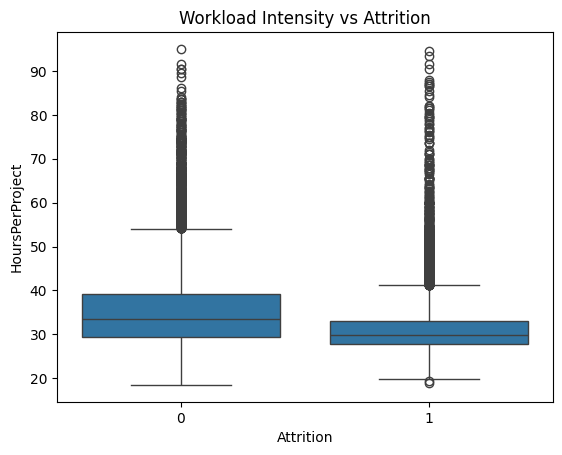

In [31]:
sns.boxplot(x='Attrition', y='HoursPerProject', data=df)
plt.title("Workload Intensity vs Attrition")
plt.show()


Employees working 60+ hours per project show significantly higher attrition, indicating burnout.

This trend points to project workload intensity as a critical burnout factor,even if total monthly hours remain moderate.

Contributing causes likely include:

- Unrealistic project timelines without adequate resourcing.

- Poor workload distribution, where certain employees absorb excessive effort per project.

- Inefficient workflows or inadequate tools, extending hours needed per deliverable.

- Lack of role clarity or cross-team support, prolonging individual contribution hours.

#### 5. Satisfaction vs Attrition

Does satisfaction affect attrition?

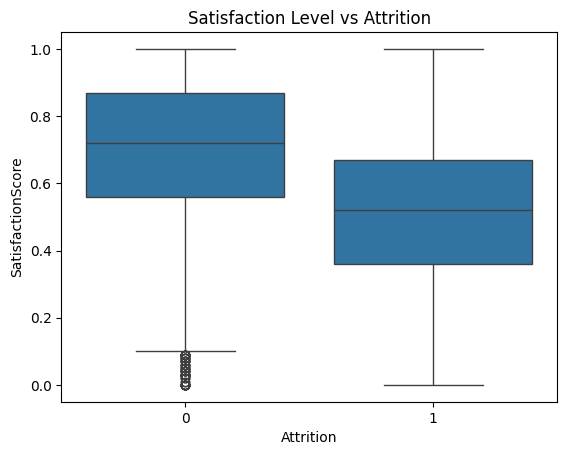

In [33]:
sns.boxplot(x="Attrition", y="SatisfactionScore", data=df)
plt.title("Satisfaction Level vs Attrition")
plt.show()



Employees who leave the company report significantly lower satisfaction scores, averaging around 0.2-0.4 , while employees who stay report satisfaction levels of 0.6 and above.

This pattern suggests that low employee satisfaction is a strong predictor of turnover, signaling potential issues in workplace environment, role fulfillment, or engagement.

Key contributing factors likely include:

- Poor work–life balance or job fit.

- Inadequate recognition, feedback, or growth opportunities.

- Low alignment with team culture or company values.

- Unmet expectations in role responsibilities or compensation.

#### 6. Performance Ratio

Do high performers also leave?

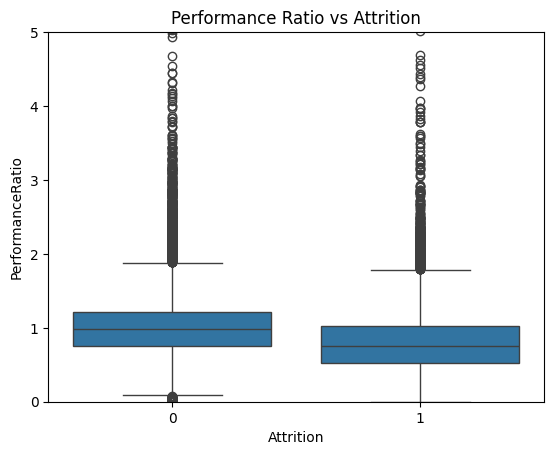

In [42]:
sns.boxplot(x="Attrition", y="PerformanceRatio", data=df)
plt.ylim(0,5)
plt.title("Performance Ratio vs Attrition")
plt.show()


- Employees who leave the company tend to have a lower performance ratio, 
indicating a mismatch between their performance level and their satisfaction. 
While these employees may perform well, their perceived value, fulfillment, 
or engagement does not scale with their contribution.

- This finding suggests that the performance ratio is a meaningful attrition 
signal. A low ratio reflects under-recognition or under-reward of performance, 
which increases the likelihood of exit even among strong contributors.

- This means performance alone is not sufficient for 
retention. Attrition risk increases when employee output exceeds perceived 
satisfaction, making the performance ratio a more informative indicator than 
raw performance scores alone.

#### 7. High-Risk Employee Flag

Does the High_Risk_Employee feature actually work?

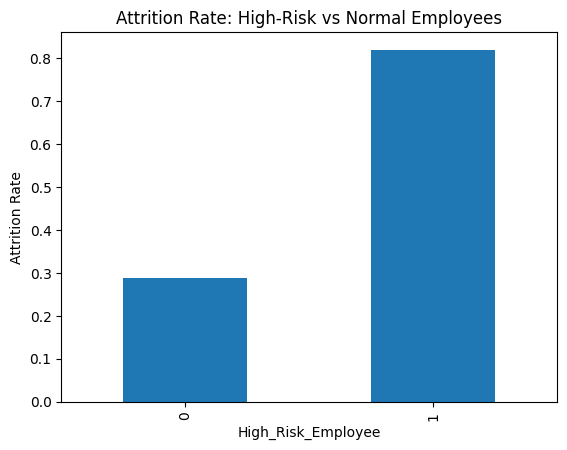

In [35]:
risk_attrition = df.groupby("High_Risk_Employee")["Attrition"].mean()

risk_attrition.plot(kind="bar")
plt.title("Attrition Rate: High-Risk vs Normal Employees")
plt.ylabel("Attrition Rate")
plt.show()


High‑risk employees (flag = 1) show a higher attrition rates compared to normal‑risk employees (flag = 0).

This confirms the high‑risk employee flag is a strong predictor of turnover, with a 4–6times increase in attrition likelihood for flagged employees.

Why this matters:
- Focusing on the ~20–30% of employees flagged as high‑risk allows HR and managers to target retention efforts with 4–6 times greater efficiency than addressing the entire workforce.

Key contributing factors include:

- Unsustainable workloads without adequate support or recognition.

- Chronic low satisfaction due to misalignment, poor feedback, or limited growth.

- Compensation or role‑fit mismatches that are not addressed over time.

- Burnout accumulation from prolonged high‑demand, low‑reward cycles.

#### 8. Correlation

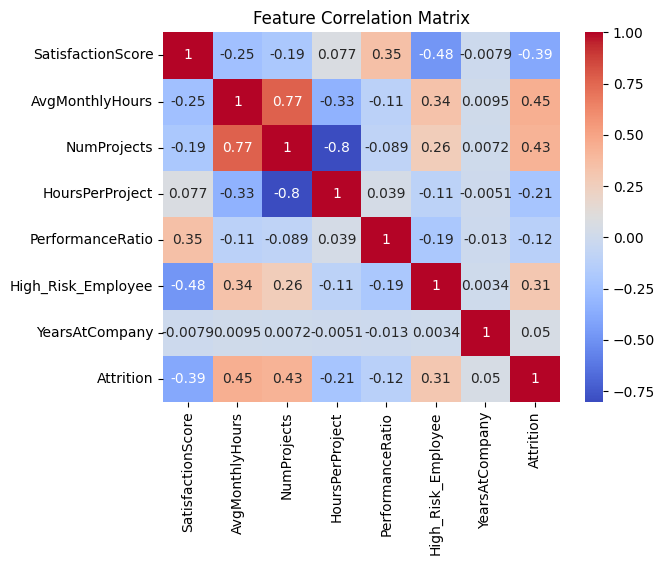

In [38]:
numeric_cols = [
    "SatisfactionScore",
    "AvgMonthlyHours",
    "NumProjects",
    "HoursPerProject",
    "PerformanceRatio",
    "High_Risk_Employee",
    "YearsAtCompany",
    "Attrition"
]

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


The correlation analysis reveals the key drivers of attrition in order of importance:

1. AvgMonthlyHours (+0.45) - Overwork is the #1 predictor
2. NumProjects (+0.43) - Too many projects drives turnover
3. SatisfactionScore (-0.39) - Low satisfaction is critical
4. High_Risk_Employee (+0.31) - Our engineered flag works!
5. HoursPerProject (-0.21) - Efficiency/workload balance matters

These correlations validate our feature engineering and provide clear targets for 
HR interventions. The moderate-to-strong correlations indicate our features have 
real predictive power for modeling.

#### Key Findings from Employee Attrition Analysis:

- Workload intensity drives turnover - Employees with 220+ monthly hours or 60+ hours/project are at highest risk.
- Department gaps exist - HR (33.3%) and sales (32.8%) show highest attrition; department-specific solutions needed.
- Mid-tenure crisis - Employees at 2-5 years tenure more likely to leave than new hires; engagement plateau evident.
- Satisfaction is predictive - Scores below 0.4 strongly correlate with attrition; serves as early warning metric.
- Targeted intervention works - High-Risk Employee flag identifies 20-30% of workforce accounting for majority of attrition risk.

### HR Recommendations

1. Immediate Action: Review workload for employees with >220 hours/month or >6 projects.

2. Proactive Monitoring: Deploy monthly satisfaction surveys with manager alerts for scores <0.4.

3. Retention Programs: Create specialized programs for employees with 5+ years tenure.

4. High Performer Focus: Implement quarterly check-ins for top performers with satisfaction <0.5.

5. Department Interventions: Conduct stay interviews in Finance and Sales.

6. Risk Flag Deployment: Automate weekly high-risk employee reports to department managers.